In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip install pmdarima

In [ ]:
# Data wrangling

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array

#Machine Learning
from sklearn import preprocessing

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Stats
from sklearn.metrics import mean_absolute_error
from math import sqrt

#Arima
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
home2_meter_2014 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home2/Home2-meter1_2014.csv')

home2_weather_2014 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home2/Home2_weather_2014.csv')

home2_meter_2015 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home2/Home2-meter1_2015.csv')

home2_weather_2015 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home2/Home2_weather_2015.csv')

In [ ]:
home2_meter=pd.concat([home2_meter_2014,home2_meter_2015], axis=0)
home2_meter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70080 entries, 0 to 35039
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date & Time               70080 non-null  object 
 1   Usage [kW]                70080 non-null  float64
 2   Generation [kW]           70080 non-null  float64
 3   WaterHeater [kW]          70080 non-null  float64
 4   Solar [kW]                70080 non-null  float64
 5   Refrigerator [kW]         70080 non-null  float64
 6   Microwave [kW]            70080 non-null  float64
 7   Furnace [kW]              70080 non-null  float64
 8   WaterHeater3 [kW]         70080 non-null  float64
 9   WaterHeater2 [kW]         70080 non-null  float64
 10  WaterHeater1 [kW]         70080 non-null  float64
 11  Master_Bdrm [kW]          70080 non-null  float64
 12  Front_Bdrm [kW]           70080 non-null  float64
 13  Kit_StoveWall [kW]        70080 non-null  float64
 14  Dishwa

In [ ]:
home2_meter.isna().any()

Date & Time                 False
Usage [kW]                  False
Generation [kW]             False
WaterHeater [kW]            False
Solar [kW]                  False
Refrigerator [kW]           False
Microwave [kW]              False
Furnace [kW]                False
WaterHeater3 [kW]           False
WaterHeater2 [kW]           False
WaterHeater1 [kW]           False
Master_Bdrm [kW]            False
Front_Bdrm [kW]             False
Kit_StoveWall [kW]          False
Dishwasher_Disposal [kW]    False
Kit_SinkWall [kW]           False
Family_Rm [kW]              False
Kit_Half-Bath_Foyer [kW]    False
Washing_Machine [kW]        False
Guest_Bdrm_SmkDet [kW]      False
Dryer [kW]                  False
Basement [kW]               False
Phase_B [kW]                False
Phase_A [kW]                False
dtype: bool

In [ ]:
home2_meter.tail()
home2_meter.head()

,Date & Time,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
0,2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,...,0.000246,0.006712,0.304094,0.016791,0.001933,0.015911,0.002213,0.027330,0.352546,0.624857
1,2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,...,0.000314,0.006490,0.043957,0.016817,0.001644,0.016907,0.002040,0.027342,0.138640,0.239106
2,2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,...,0.000008,0.007062,0.043480,0.016812,0.001909,0.015923,0.002329,0.027301,0.226917,0.193279
3,2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,...,0.000263,0.006588,0.043203,0.016810,0.001678,0.015803,0.002049,0.027338,0.098616,0.191712
4,2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,...,0.000258,0.006566,0.043263,0.016826,0.001756,0.015882,0.002213,0.027307,0.118107,0.189509


In [ ]:
home2_meter[home2_meter.duplicated(subset = 'Date & Time', keep=False)].count()

Date & Time                 16
Usage [kW]                  16
Generation [kW]             16
WaterHeater [kW]            16
Solar [kW]                  16
Refrigerator [kW]           16
Microwave [kW]              16
Furnace [kW]                16
WaterHeater3 [kW]           16
WaterHeater2 [kW]           16
WaterHeater1 [kW]           16
Master_Bdrm [kW]            16
Front_Bdrm [kW]             16
Kit_StoveWall [kW]          16
Dishwasher_Disposal [kW]    16
Kit_SinkWall [kW]           16
Family_Rm [kW]              16
Kit_Half-Bath_Foyer [kW]    16
Washing_Machine [kW]        16
Guest_Bdrm_SmkDet [kW]      16
Dryer [kW]                  16
Basement [kW]               16
Phase_B [kW]                16
Phase_A [kW]                16
dtype: int64

Dropping rows with duplicate timestamps

In [ ]:
home2_meter.drop_duplicates(subset = 'Date & Time', keep='first', inplace=True)

In [ ]:
home2_meter.isna().any()

Date & Time                 False
Usage [kW]                  False
Generation [kW]             False
WaterHeater [kW]            False
Solar [kW]                  False
Refrigerator [kW]           False
Microwave [kW]              False
Furnace [kW]                False
WaterHeater3 [kW]           False
WaterHeater2 [kW]           False
WaterHeater1 [kW]           False
Master_Bdrm [kW]            False
Front_Bdrm [kW]             False
Kit_StoveWall [kW]          False
Dishwasher_Disposal [kW]    False
Kit_SinkWall [kW]           False
Family_Rm [kW]              False
Kit_Half-Bath_Foyer [kW]    False
Washing_Machine [kW]        False
Guest_Bdrm_SmkDet [kW]      False
Dryer [kW]                  False
Basement [kW]               False
Phase_B [kW]                False
Phase_A [kW]                False
dtype: bool

In [ ]:
home2_meter.describe()

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
count,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,...,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000,70072.000000
mean,1.315696,1.447148,0.098375,1.447148,0.071404,0.008036,0.093760,0.002175,0.019586,0.076954,...,0.013811,0.007845,0.237358,0.018679,0.007669,0.030380,0.063463,0.032859,0.629725,0.685971
std,1.459311,2.410198,0.657480,2.410198,0.054676,0.032145,0.149466,0.040235,0.211743,0.485550,...,0.103996,0.017119,0.252212,0.009594,0.041144,0.024052,0.430096,0.048083,0.731820,0.777761
min,0.000000,0.000002,0.000000,0.000002,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.438555,0.010136,0.001004,0.010136,0.022324,0.002550,0.008854,0.000204,0.000087,0.000824,...,0.000159,0.005991,0.034974,0.016199,0.001906,0.018818,0.002436,0.023026,0.198791,0.178021
50%,0.815778,0.011398,0.002438,0.011398,0.068904,0.002740,0.010919,0.000453,0.000213,0.001693,...,0.000317,0.006717,0.044914,0.016626,0.002202,0.019757,0.002660,0.023860,0.312770,0.363623
75%,1.285034,1.859646,0.004736,1.859646,0.114647,0.003072,0.159398,0.000973,0.000571,0.003089,...,0.000513,0.007171,0.536949,0.016811,0.002451,0.033325,0.002954,0.024290,0.670740,0.779539
max,20.819441,11.852416,16.090722,11.852416,0.611459,1.450732,0.629318,5.176591,7.438931,8.483031,...,1.128637,0.258111,4.818643,0.151519,0.596676,0.295278,5.387382,0.329452,10.195053,10.624388


In [ ]:
home2_weather=pd.concat([home2_weather_2014,home2_weather_2015], axis=0)
home2_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          17520 non-null  float64
 1   icon                 17520 non-null  object 
 2   humidity             17520 non-null  float64
 3   visibility           17520 non-null  float64
 4   summary              17520 non-null  object 
 5   apparentTemperature  17520 non-null  float64
 6   pressure             17518 non-null  float64
 7   windSpeed            17517 non-null  float64
 8   cloudCover           15020 non-null  float64
 9   time                 17520 non-null  int64  
 10  windBearing          17517 non-null  float64
 11  precipIntensity      17520 non-null  float64
 12  dewPoint             17520 non-null  float64
 13  precipProbability    17520 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
home2_weather['time'] = pd.to_datetime(home2_weather['time'],unit='s') - pd.Timedelta('05:00:00')
home2_weather

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.85,clear-night,0.46,10.0,Clear,8.33,1023.40,12.83,0.00,2014-01-01 00:00:00,284.0,0.0,3.36,0.0
1,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.00,2014-01-01 01:00:00,285.0,0.0,2.94,0.0
2,18.75,clear-night,0.51,10.0,Clear,8.99,1024.41,7.65,0.00,2014-01-01 02:00:00,257.0,0.0,3.62,0.0
3,17.97,clear-night,0.55,10.0,Clear,8.16,1025.14,7.50,0.00,2014-01-01 03:00:00,244.0,0.0,4.39,0.0
4,15.73,clear-night,0.61,10.0,Clear,7.26,1025.27,5.62,0.00,2014-01-01 04:00:00,213.0,0.0,4.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,36.68,cloudy,0.69,10.0,Overcast,30.91,1017.50,7.38,1.00,2015-12-31 19:00:00,284.0,0.0,27.54,0.0
8756,37.50,partly-cloudy-night,0.65,10.0,Partly Cloudy,31.49,1017.58,8.10,0.31,2015-12-31 20:00:00,290.0,0.0,26.89,0.0
8757,37.15,clear-night,0.62,10.0,Clear,29.58,1017.47,11.19,NaN,2015-12-31 21:00:00,283.0,0.0,25.47,0.0
8758,37.30,partly-cloudy-night,0.61,10.0,Partly Cloudy,31.95,1017.54,6.89,0.31,2015-12-31 22:00:00,290.0,0.0,25.11,0.0


In [ ]:
home2_weather[home2_weather.duplicated(subset = 'time', keep=False)]

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability


Checking for null values

In [ ]:
home2_weather.isna().sum()

temperature               0
icon                      0
humidity                  0
visibility                0
summary                   0
apparentTemperature       0
pressure                  2
windSpeed                 3
cloudCover             2500
time                      0
windBearing               3
precipIntensity           0
dewPoint                  0
precipProbability         0
dtype: int64

Dropping cloudCover as 2500 values are missing

In [ ]:
home2_weather = home2_weather.drop(columns=['cloudCover'])

In [ ]:
home2_weather.summary.unique()


array(['Clear', 'Partly Cloudy', 'Light Snow', 'Flurries', 'Snow',
       'Heavy Snow', 'Overcast', 'Foggy', 'Light Rain', 'Drizzle', 'Rain',
       'Breezy', 'Mostly Cloudy', 'Light Snow and Breezy',
       'Breezy and Overcast', 'Windy', 'Heavy Rain',
       'Breezy and Partly Cloudy', 'Rain and Breezy',
       'Light Rain and Breezy', 'Breezy and Mostly Cloudy',
       'Snow and Breezy', 'Heavy Snow and Breezy', 'Flurries and Breezy',
       'Windy and Partly Cloudy', 'Drizzle and Windy',
       'Humid and Overcast', 'Drizzle and Breezy'], dtype=object)

In [ ]:
home2_weather.icon.unique()

array(['clear-night', 'clear-day', 'partly-cloudy-night', 'snow',
       'cloudy', 'fog', 'rain', 'wind', 'partly-cloudy-day'], dtype=object)

In [ ]:
home2_weather=home2_weather.drop(columns=['icon'])


Summary column has categorical data so we want to encode it

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
home2_weather['summary'] = le.fit_transform(home2_weather.summary.values)
home2_weather

,temperature,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.85,0.46,10.0,4,8.33,1023.40,12.83,2014-01-01 00:00:00,284.0,0.0,3.36,0.0
1,19.72,0.47,10.0,4,8.49,1023.36,10.03,2014-01-01 01:00:00,285.0,0.0,2.94,0.0
2,18.75,0.51,10.0,4,8.99,1024.41,7.65,2014-01-01 02:00:00,257.0,0.0,3.62,0.0
3,17.97,0.55,10.0,4,8.16,1025.14,7.50,2014-01-01 03:00:00,244.0,0.0,4.39,0.0
4,15.73,0.61,10.0,4,7.26,1025.27,5.62,2014-01-01 04:00:00,213.0,0.0,4.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,36.68,0.69,10.0,20,30.91,1017.50,7.38,2015-12-31 19:00:00,284.0,0.0,27.54,0.0
8756,37.50,0.65,10.0,21,31.49,1017.58,8.10,2015-12-31 20:00:00,290.0,0.0,26.89,0.0
8757,37.15,0.62,10.0,4,29.58,1017.47,11.19,2015-12-31 21:00:00,283.0,0.0,25.47,0.0
8758,37.30,0.61,10.0,21,31.95,1017.54,6.89,2015-12-31 22:00:00,290.0,0.0,25.11,0.0


In [ ]:
home2_meter['Date & Time'] = pd.to_datetime(home2_meter['Date & Time'])
home2_meter_hourly = home2_meter.resample('1H', on='Date & Time').sum()
home2_meter_hourly

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.065671,0.039331,0.361640,0.039331,0.201203,0.011254,0.033678,0.001458,0.029858,0.333578,...,0.000831,0.026852,0.434734,0.067230,0.007164,0.064544,0.008631,0.109311,0.816718,1.248953
2014-01-01 01:00:00,1.297101,0.040687,0.002053,0.040687,0.165111,0.010208,0.033694,0.001253,0.000633,0.003602,...,0.000791,0.026860,0.173141,0.067234,0.007060,0.063452,0.008713,0.109200,0.543258,0.753843
2014-01-01 02:00:00,1.417962,0.040889,0.003509,0.040889,0.259852,0.010559,0.102420,0.000982,0.000516,0.004567,...,0.000559,0.027340,0.171671,0.067249,0.007064,0.064726,0.008620,0.109248,0.670051,0.747911
2014-01-01 03:00:00,1.625286,0.040787,0.003960,0.040787,0.141798,0.010917,0.413354,0.001187,0.000520,0.005240,...,0.001080,0.026268,0.170409,0.067226,0.007053,0.063420,0.008751,0.109053,0.881649,0.743637
2014-01-01 04:00:00,2.668839,0.043684,0.010016,0.043684,0.140737,0.010956,1.494646,0.000858,0.000549,0.010324,...,0.001770,0.025201,0.174709,0.067219,0.007469,0.064578,0.008904,0.109230,1.912667,0.756172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,22.399769,0.022373,0.042211,0.022373,0.351404,0.012814,0.034791,0.012018,0.006024,0.024169,...,0.004870,0.117009,3.149002,0.487144,0.010538,0.363741,0.013664,1.221281,9.463688,12.936081
2015-12-31 20:00:00,24.316530,0.028462,0.022382,0.028462,0.345076,0.017870,1.008694,0.006604,0.003376,0.012407,...,0.003577,0.025760,2.686518,0.244377,0.009892,0.551248,0.015297,1.213901,11.977666,12.338864
2015-12-31 21:00:00,11.222448,0.031233,0.022671,0.031233,0.387708,0.014819,0.402723,0.005862,0.001931,0.014878,...,0.002168,0.027612,2.602177,0.232102,0.008199,0.538393,0.013292,1.190399,4.616716,6.605732


In [ ]:
home2_meter['Date & Time'] = pd.to_datetime(home2_meter['Date & Time'])
home2_meter_daily = home2_meter.resample('1D', on='Date & Time').sum()
home2_meter_daily

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,118.949648,121.927020,28.617776,121.927020,6.201090,0.346443,16.489983,0.680082,12.124891,15.875789,...,0.046108,0.578291,24.962889,1.713259,1.866318,1.621801,16.064213,4.946774,53.079721,65.869927
2014-01-02,158.077851,0.940418,31.591447,0.940418,6.576777,0.974521,19.339827,0.762547,12.666069,18.308698,...,5.931638,0.604116,20.762267,2.232887,0.180256,1.543253,0.234220,4.907862,73.698202,84.379649
2014-01-03,117.970034,2.566238,21.269960,2.566238,6.705404,1.268391,23.249608,0.240522,9.120418,11.945216,...,0.049968,0.630141,37.148528,1.617328,0.190738,1.535067,0.216903,4.854456,51.247777,66.722258
2014-01-04,167.350007,5.615047,27.890180,5.615047,6.171961,2.488196,23.098876,0.324253,11.304882,16.326560,...,0.047387,0.633191,27.746501,2.325618,0.185500,1.616660,0.213889,4.809353,79.280353,88.069653
2014-01-05,132.849590,32.461369,41.123138,32.461369,6.812220,0.621927,17.872811,0.846989,17.203851,23.122400,...,0.044709,0.620170,31.897053,2.224317,0.933800,1.688786,7.966604,4.810151,57.818308,75.031282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,131.092316,18.223218,0.449616,18.223218,6.736331,1.458132,11.467201,0.123780,0.082496,0.250251,...,0.042306,0.614458,27.311281,1.917424,0.454334,2.152734,13.247013,11.508810,73.624043,57.468272
2015-12-28,185.077504,111.920336,0.344498,111.920336,6.863973,1.058566,10.187284,0.097907,0.048547,0.209382,...,0.037360,0.601791,25.396104,2.231333,3.010141,1.987149,24.443554,11.366516,93.056529,92.020976
2015-12-29,199.638593,2.136509,0.415171,2.136509,7.206916,0.528038,13.451567,0.117818,0.067667,0.235682,...,0.051821,0.645764,36.932670,2.584943,1.754802,4.367597,15.727818,11.439282,98.484688,101.153906


In [ ]:
home2_weather['time'] = pd.to_datetime(home2_weather['time'])
home2_weather = home2_weather.set_index('time')
home2_weather

,temperature,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,
2014-01-01 00:00:00,20.85,0.46,10.0,4,8.33,1023.40,12.83,284.0,0.0,3.36,0.0
2014-01-01 01:00:00,19.72,0.47,10.0,4,8.49,1023.36,10.03,285.0,0.0,2.94,0.0
2014-01-01 02:00:00,18.75,0.51,10.0,4,8.99,1024.41,7.65,257.0,0.0,3.62,0.0
2014-01-01 03:00:00,17.97,0.55,10.0,4,8.16,1025.14,7.50,244.0,0.0,4.39,0.0
2014-01-01 04:00:00,15.73,0.61,10.0,4,7.26,1025.27,5.62,213.0,0.0,4.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,36.68,0.69,10.0,20,30.91,1017.50,7.38,284.0,0.0,27.54,0.0
2015-12-31 20:00:00,37.50,0.65,10.0,21,31.49,1017.58,8.10,290.0,0.0,26.89,0.0
2015-12-31 21:00:00,37.15,0.62,10.0,4,29.58,1017.47,11.19,283.0,0.0,25.47,0.0


In [ ]:
merged_hourly = home2_meter_hourly.merge(home2_weather, left_index=True, right_index=True)
merged_hourly 

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.065671,0.039331,0.361640,0.039331,0.201203,0.011254,0.033678,0.001458,0.029858,0.333578,...,0.46,10.0,4,8.33,1023.40,12.83,284.0,0.0,3.36,0.0
2014-01-01 01:00:00,1.297101,0.040687,0.002053,0.040687,0.165111,0.010208,0.033694,0.001253,0.000633,0.003602,...,0.47,10.0,4,8.49,1023.36,10.03,285.0,0.0,2.94,0.0
2014-01-01 02:00:00,1.417962,0.040889,0.003509,0.040889,0.259852,0.010559,0.102420,0.000982,0.000516,0.004567,...,0.51,10.0,4,8.99,1024.41,7.65,257.0,0.0,3.62,0.0
2014-01-01 03:00:00,1.625286,0.040787,0.003960,0.040787,0.141798,0.010917,0.413354,0.001187,0.000520,0.005240,...,0.55,10.0,4,8.16,1025.14,7.50,244.0,0.0,4.39,0.0
2014-01-01 04:00:00,2.668839,0.043684,0.010016,0.043684,0.140737,0.010956,1.494646,0.000858,0.000549,0.010324,...,0.61,10.0,4,7.26,1025.27,5.62,213.0,0.0,4.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,22.399769,0.022373,0.042211,0.022373,0.351404,0.012814,0.034791,0.012018,0.006024,0.024169,...,0.69,10.0,20,30.91,1017.50,7.38,284.0,0.0,27.54,0.0
2015-12-31 20:00:00,24.316530,0.028462,0.022382,0.028462,0.345076,0.017870,1.008694,0.006604,0.003376,0.012407,...,0.65,10.0,21,31.49,1017.58,8.10,290.0,0.0,26.89,0.0
2015-12-31 21:00:00,11.222448,0.031233,0.022671,0.031233,0.387708,0.014819,0.402723,0.005862,0.001931,0.014878,...,0.62,10.0,4,29.58,1017.47,11.19,283.0,0.0,25.47,0.0


In [ ]:
merged_hourly[merged_hourly.duplicated( keep=False)]

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,


In [ ]:
merged_hourly['Day of the week'] = merged_hourly.index.dayofweek
merged_hourly['Day of the month'] = merged_hourly.index.day
merged_hourly['Month'] = merged_hourly.index.month
merged_hourly['Year'] = merged_hourly.index.year
merged_hourly['Hour'] = merged_hourly.index.hour

In [ ]:
merged_hourly.tail(100)

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Day of the week,Day of the month,Month,Year,Hour
Date & Time,,,,,,,,,,,,,,,,,,,,,
2015-12-27 20:00:00,8.155023,0.034413,0.014240,0.034413,0.364103,0.081298,0.833056,0.004127,0.001336,0.009373,...,13.64,318.0,0.0000,41.86,0.00,6,27,12,2015,20
2015-12-27 21:00:00,5.659058,0.036180,0.011578,0.036180,0.184422,0.014151,0.531757,0.003644,0.000956,0.007533,...,11.59,331.0,0.0000,37.85,0.00,6,27,12,2015,21
2015-12-27 22:00:00,3.706717,0.038629,0.003104,0.038629,0.289157,0.013687,0.221422,0.001200,0.000751,0.002024,...,15.81,328.0,0.0025,32.91,0.08,6,27,12,2015,22
2015-12-27 23:00:00,2.896689,0.040480,0.008140,0.040480,0.196158,0.013119,0.034969,0.002258,0.001698,0.004407,...,12.44,348.0,0.0000,30.47,0.00,6,27,12,2015,23
2015-12-28 00:00:00,2.769383,0.041524,0.013080,0.041524,0.275381,0.013644,0.034336,0.003291,0.002902,0.006887,...,10.87,343.0,0.0000,28.31,0.00,0,28,12,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,22.399769,0.022373,0.042211,0.022373,0.351404,0.012814,0.034791,0.012018,0.006024,0.024169,...,7.38,284.0,0.0000,27.54,0.00,3,31,12,2015,19
2015-12-31 20:00:00,24.316530,0.028462,0.022382,0.028462,0.345076,0.017870,1.008694,0.006604,0.003376,0.012407,...,8.10,290.0,0.0000,26.89,0.00,3,31,12,2015,20
2015-12-31 21:00:00,11.222448,0.031233,0.022671,0.031233,0.387708,0.014819,0.402723,0.005862,0.001931,0.014878,...,11.19,283.0,0.0000,25.47,0.00,3,31,12,2015,21


In [ ]:
merged_hourly.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2014-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Usage [kW]                17520 non-null  float64
 1   Generation [kW]           17520 non-null  float64
 2   WaterHeater [kW]          17520 non-null  float64
 3   Solar [kW]                17520 non-null  float64
 4   Refrigerator [kW]         17520 non-null  float64
 5   Microwave [kW]            17520 non-null  float64
 6   Furnace [kW]              17520 non-null  float64
 7   WaterHeater3 [kW]         17520 non-null  float64
 8   WaterHeater2 [kW]         17520 non-null  float64
 9   WaterHeater1 [kW]         17520 non-null  float64
 10  Master_Bdrm [kW]          17520 non-null  float64
 11  Front_Bdrm [kW]           17520 non-null  float64
 12  Kit_StoveWall [kW]        17520 non-null  float64
 13  Dishwasher_Disposa

In [ ]:
merged_hourly['WaterHeater [kW]'] = merged_hourly['WaterHeater1 [kW]'] + merged_hourly['WaterHeater2 [kW]']+ merged_hourly['WaterHeater3 [kW]']
merged_hourly=merged_hourly.drop(columns=['WaterHeater1 [kW]','WaterHeater2 [kW]','WaterHeater3 [kW]'])
merged_hourly

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],Master_Bdrm [kW],Front_Bdrm [kW],Kit_StoveWall [kW],...,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Day of the week,Day of the month,Month,Year,Hour
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.065671,0.039331,0.364893,0.039331,0.201203,0.011254,0.033678,0.184604,0.000366,0.026153,...,12.83,284.0,0.0,3.36,0.0,2,1,1,2014,0
2014-01-01 01:00:00,1.297101,0.040687,0.005489,0.040687,0.165111,0.010208,0.033694,0.131572,0.000319,0.026094,...,10.03,285.0,0.0,2.94,0.0,2,1,1,2014,1
2014-01-01 02:00:00,1.417962,0.040889,0.006064,0.040889,0.259852,0.010559,0.102420,0.125988,0.000351,0.026176,...,7.65,257.0,0.0,3.62,0.0,2,1,1,2014,2
2014-01-01 03:00:00,1.625286,0.040787,0.006947,0.040787,0.141798,0.010917,0.413354,0.124834,0.000290,0.026063,...,7.50,244.0,0.0,4.39,0.0,2,1,1,2014,3
2014-01-01 04:00:00,2.668839,0.043684,0.011731,0.043684,0.140737,0.010956,1.494646,0.126294,0.000324,0.026221,...,5.62,213.0,0.0,4.56,0.0,2,1,1,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,22.399769,0.022373,0.042211,0.022373,0.351404,0.012814,0.034791,0.062509,0.899074,0.013376,...,7.38,284.0,0.0,27.54,0.0,3,31,12,2015,19
2015-12-31 20:00:00,24.316530,0.028462,0.022387,0.028462,0.345076,0.017870,1.008694,0.041201,2.902092,0.010128,...,8.10,290.0,0.0,26.89,0.0,3,31,12,2015,20
2015-12-31 21:00:00,11.222448,0.031233,0.022671,0.031233,0.387708,0.014819,0.402723,0.072286,1.695636,0.011983,...,11.19,283.0,0.0,25.47,0.0,3,31,12,2015,21


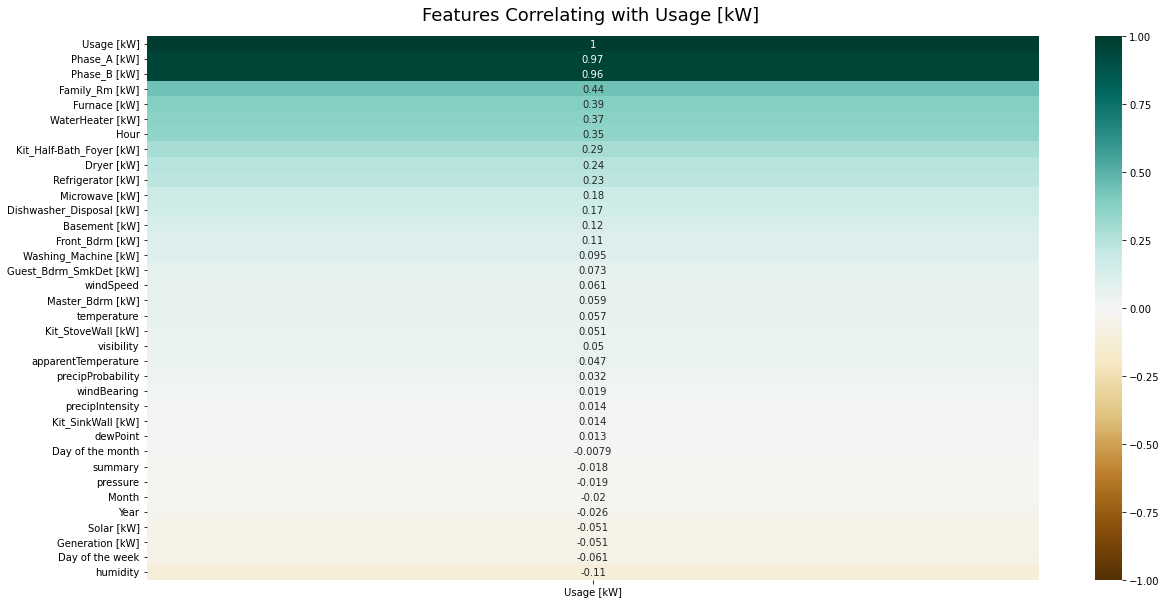

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(merged_hourly.corr()[['Usage [kW]']].sort_values(by='Usage [kW]', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Usage [kW] ', fontdict={'fontsize':18}, pad=16);

In [ ]:
home2_weather_daily = home2_weather.resample('1D').agg({'temperature':'mean', 'humidity':'mean', 'visibility':'mean', 'summary':pd.Series.mode, 'apparentTemperature':'mean', 'pressure':'mean', 'windSpeed':'mean', 'windBearing':'mean', 'precipIntensity':'mean', 'dewPoint':'mean', 'precipProbability':'mean'})
merged_daily = home2_meter_daily.merge(home2_weather_daily, left_index=True, right_index=True)
merged_daily

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,118.949648,121.927020,28.617776,121.927020,6.201090,0.346443,16.489983,0.680082,12.124891,15.875789,...,0.544167,9.685417,4,13.827500,1026.975417,6.404167,235.708333,0.000000,6.789167,0.000000
2014-01-02,158.077851,0.940418,31.591447,0.940418,6.576777,0.974521,19.339827,0.762547,12.666069,18.308698,...,0.813750,2.385833,17,1.960000,1020.222917,9.987083,26.750000,0.005321,9.579167,0.187083
2014-01-03,117.970034,2.566238,21.269960,2.566238,6.705404,1.268391,23.249608,0.240522,9.120418,11.945216,...,0.653750,6.275417,4,-9.334583,1017.974167,11.264167,250.458333,0.005179,-4.526667,0.159583
2014-01-04,167.350007,5.615047,27.890180,5.615047,6.171961,2.488196,23.098876,0.324253,11.304882,16.326560,...,0.599167,9.832500,4,0.300000,1029.494167,5.966250,219.666667,0.000000,-4.842083,0.000000
2014-01-05,132.849590,32.461369,41.123138,32.461369,6.812220,0.621927,17.872811,0.846989,17.203851,23.122400,...,0.765000,7.442083,4,18.913750,1023.626667,2.406667,148.458333,0.000654,14.290417,0.029583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,131.092316,18.223218,0.449616,18.223218,6.736331,1.458132,11.467201,0.123780,0.082496,0.250251,...,0.860833,6.815833,4,43.982917,1014.515833,5.191250,217.791667,0.005983,41.698750,0.197500
2015-12-28,185.077504,111.920336,0.344498,111.920336,6.863973,1.058566,10.187284,0.097907,0.048547,0.209382,...,0.516667,9.937917,4,23.600417,1030.246250,9.567917,151.000000,0.000000,15.427083,0.000000
2015-12-29,199.638593,2.136509,0.415171,2.136509,7.206916,0.528038,13.451567,0.117818,0.067667,0.235682,...,0.850833,4.455417,4,21.984583,1023.295833,6.740833,35.083333,0.018171,24.829167,0.365833


In [ ]:
merged_daily['WaterHeater [kW]'] = merged_daily['WaterHeater1 [kW]'] + merged_daily['WaterHeater2 [kW]']+ merged_daily['WaterHeater3 [kW]']
merged_daily=merged_daily.drop(columns=['WaterHeater1 [kW]','WaterHeater2 [kW]','WaterHeater3 [kW]'])
merged_daily

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],Master_Bdrm [kW],Front_Bdrm [kW],Kit_StoveWall [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,118.949648,121.927020,28.680762,121.927020,6.201090,0.346443,16.489983,3.727976,0.026487,1.354317,...,0.544167,9.685417,4,13.827500,1026.975417,6.404167,235.708333,0.000000,6.789167,0.000000
2014-01-02,158.077851,0.940418,31.737313,0.940418,6.576777,0.974521,19.339827,4.250382,0.014997,0.913724,...,0.813750,2.385833,17,1.960000,1020.222917,9.987083,26.750000,0.005321,9.579167,0.187083
2014-01-03,117.970034,2.566238,21.306156,2.566238,6.705404,1.268391,23.249608,3.373222,0.014013,1.092263,...,0.653750,6.275417,4,-9.334583,1017.974167,11.264167,250.458333,0.005179,-4.526667,0.159583
2014-01-04,167.350007,5.615047,27.955696,5.615047,6.171961,2.488196,23.098876,3.049230,0.017308,0.756930,...,0.599167,9.832500,4,0.300000,1029.494167,5.966250,219.666667,0.000000,-4.842083,0.000000
2014-01-05,132.849590,32.461369,41.173240,32.461369,6.812220,0.621927,17.872811,3.088588,0.017593,1.330527,...,0.765000,7.442083,4,18.913750,1023.626667,2.406667,148.458333,0.000654,14.290417,0.029583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,131.092316,18.223218,0.456527,18.223218,6.736331,1.458132,11.467201,1.164374,42.340553,1.186303,...,0.860833,6.815833,4,43.982917,1014.515833,5.191250,217.791667,0.005983,41.698750,0.197500
2015-12-28,185.077504,111.920336,0.355836,111.920336,6.863973,1.058566,10.187284,1.466307,26.114624,0.677973,...,0.516667,9.937917,4,23.600417,1030.246250,9.567917,151.000000,0.000000,15.427083,0.000000
2015-12-29,199.638593,2.136509,0.421167,2.136509,7.206916,0.528038,13.451567,1.042488,31.849602,0.643689,...,0.850833,4.455417,4,21.984583,1023.295833,6.740833,35.083333,0.018171,24.829167,0.365833


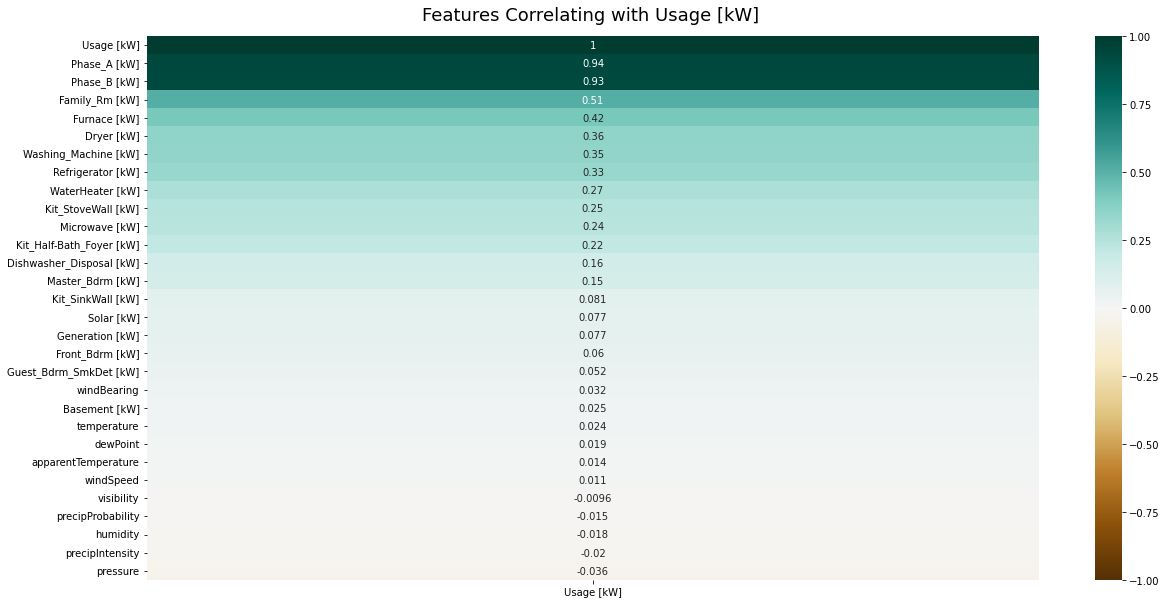

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(merged_daily.corr()[['Usage [kW]']].sort_values(by='Usage [kW]', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Usage [kW] ', fontdict={'fontsize':18}, pad=16);

**Visualizations**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc60a7880d0>,
      dtype=object)

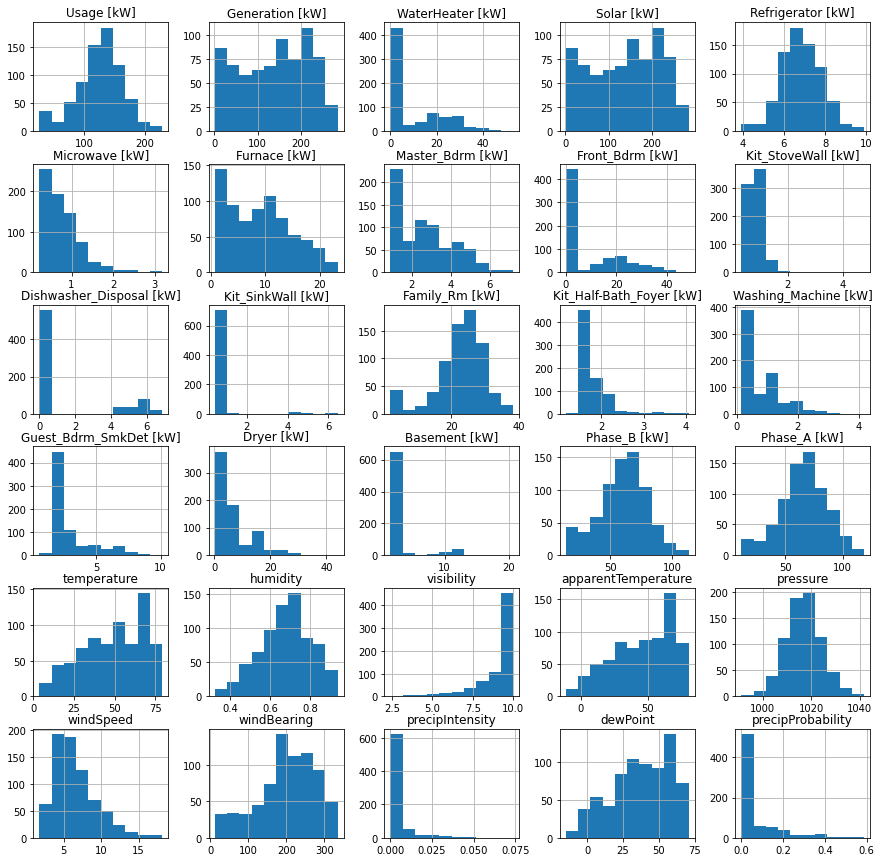

In [ ]:
merged_daily.hist(figsize =(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc60a0f77d0>,
      dtype=object)

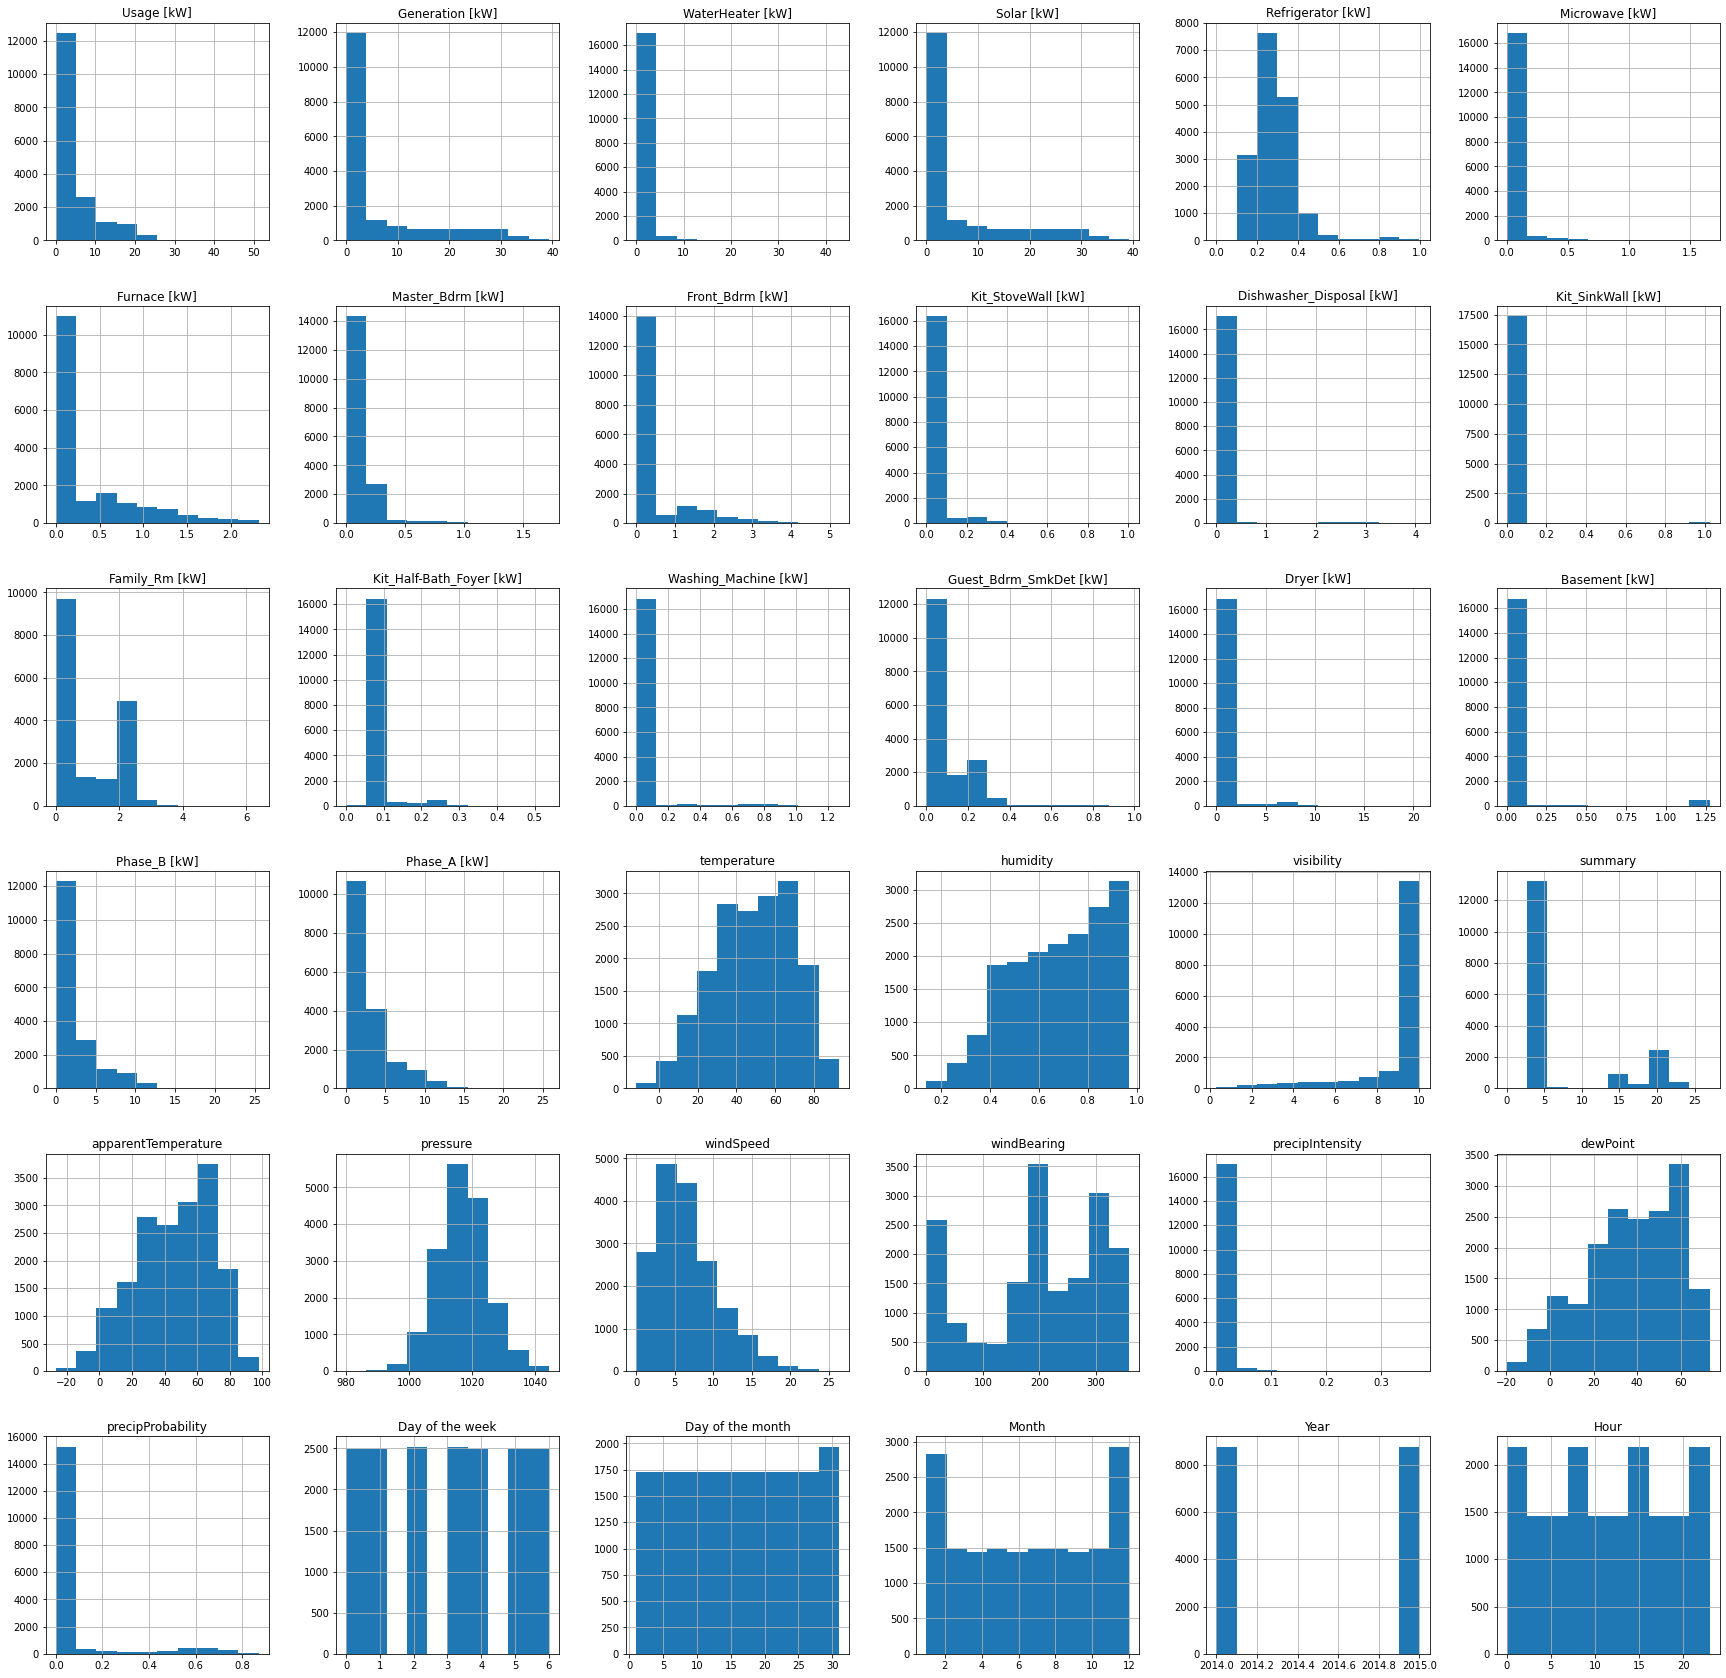

In [ ]:
merged_hourly.hist(figsize =(30,30))

In the figure above, we can see that the actual energy price roughly follows a normal distribution and thus, could be standardized. However, we also have to make sure that the time series does not require any other kinds of transformations. More specifically, we will check whether the time series of energy price is stationary, after visualizing its decomposed component time-series.



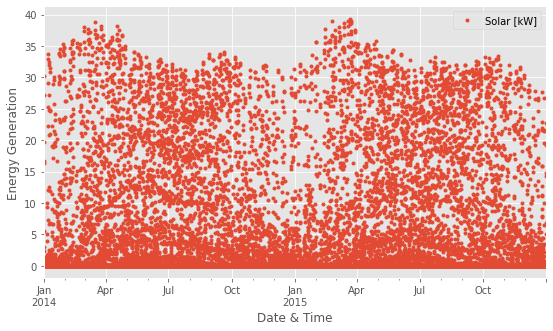

In [ ]:
plt.style.use("ggplot")
cols_plot = ["Solar [kW]"]
axes=merged_hourly[cols_plot].plot(marker=".", linestyle= "None", subplots= True, figsize=(9,5))
for ax in axes:
    ax.set_ylabel('Energy Generation')


Generation from solar tends to more during the summer, especially around July 

1.   List item
2.   List item

- Aug and less during the colder 
seasons. 

**Splitting training and testing data**

In [ ]:
# create train test partition
date_first_dec_2015 = pd.Timestamp(year=2015, month=12, day=1)
train_hourly = merged_hourly[merged_hourly.index < date_first_dec_2015]
test_hourly = merged_hourly[merged_hourly.index >= date_first_dec_2015]
train_daily = merged_daily[merged_daily.index < date_first_dec_2015]
test_daily = merged_daily[merged_daily.index >= date_first_dec_2015]

In [ ]:
test_daily.tail(31)

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],Master_Bdrm [kW],Front_Bdrm [kW],Kit_StoveWall [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2015-12-01,178.085889,16.584038,0.480020,16.584038,6.554603,1.389147,12.279958,2.310000,28.276038,0.755560,...,0.857500,8.518333,4,29.696667,1024.765833,3.848333,41.541667,0.005033,28.792083,0.172500
2015-12-02,109.421542,9.881216,0.345291,9.881216,6.796749,0.906912,8.411877,2.040753,22.780058,0.741621,...,0.938333,3.721667,15,40.988333,1010.588333,1.787500,154.000000,0.013183,39.675417,0.317917
2015-12-03,169.044441,80.489067,0.363942,80.489067,6.982588,0.452992,7.460618,1.480800,20.840131,0.408438,...,0.711667,8.962083,4,37.347917,1009.020000,10.865417,287.583333,0.000283,33.822917,0.006667
2015-12-04,166.333969,48.651551,0.340991,48.651551,6.183622,0.753522,8.569228,1.061852,21.742907,0.693652,...,0.646250,9.993750,4,35.236250,1028.191250,7.802917,288.041667,0.000000,29.180000,0.000000
2015-12-05,110.128881,142.096289,0.347467,142.096289,6.189349,0.414629,7.878794,2.689129,25.649341,1.238726,...,0.766250,9.098750,4,35.712917,1036.728750,2.935000,272.000000,0.000000,29.679167,0.000000
2015-12-06,129.380353,75.266384,0.465196,75.266384,7.469299,0.777792,10.247701,1.565651,26.714454,1.129134,...,0.811250,6.095417,4,32.886667,1030.272500,2.882917,232.875000,0.000000,28.682917,0.000000
2015-12-07,143.279213,132.871809,0.362442,132.871809,6.215527,0.932280,9.618422,1.412899,26.601497,0.719602,...,0.730833,8.287083,4,35.000417,1020.251250,3.826667,256.208333,0.000000,28.203333,0.000000
2015-12-08,190.985510,66.660862,0.477144,66.660862,6.425109,1.205499,8.086344,1.857700,23.451789,0.699463,...,0.712917,9.737500,4,33.066250,1020.230000,6.393750,32.166667,0.000000,29.182500,0.000000
2015-12-09,109.244218,24.263422,0.319958,24.263422,7.548739,0.920219,8.305084,2.303736,22.712674,0.762668,...,0.768333,9.397083,4,38.041250,1020.038696,3.991667,149.083333,0.000000,33.189167,0.000000


**Naive model**

In [ ]:
def naive_daily(train, test):
  test = test.shift(7)
  test['2015-12-01':'2015-12-07'] = train['2015-11-24':'2015-12-01']
  naive_model = test['Usage [kW]']
  return naive_model

In [ ]:
naive_daily = naive_daily(train_daily, test_daily)
naive_daily

Date & Time
2015-12-01    158.418623
2015-12-02    162.177116
2015-12-03    135.034090
2015-12-04    115.895130
2015-12-05     96.703264
2015-12-06    119.606996
2015-12-07    183.281441
2015-12-08    178.085889
2015-12-09    109.421542
2015-12-10    169.044441
2015-12-11    166.333969
2015-12-12    110.128881
2015-12-13    129.380353
2015-12-14    143.279213
2015-12-15    190.985510
2015-12-16    109.244218
2015-12-17    113.931566
2015-12-18    195.483833
2015-12-19    109.495502
2015-12-20     97.653560
2015-12-21    164.741397
2015-12-22    162.541311
2015-12-23     91.354811
2015-12-24    141.231756
2015-12-25    203.686684
2015-12-26     55.925326
2015-12-27     44.161984
2015-12-28     44.903618
2015-12-29     41.235781
2015-12-30     40.999290
2015-12-31     37.141638
Freq: D, Name: Usage [kW], dtype: float64

In [ ]:
print(mean_absolute_error(test_daily['Usage [kW]'], naive_daily))

58.35086491035484


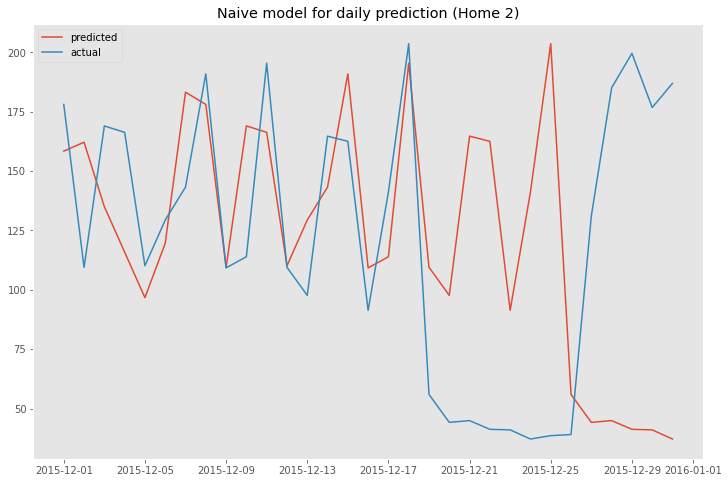

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(naive_daily, label='predicted')
plt.plot(test_daily['Usage [kW]'], label='actual')
plt.title('Naive model for daily prediction (Home 2)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def naive_hourly(train, test):
  test = test.shift(24*7)
  test['2015-12-01':'2015-12-07'] = train['2015-11-24':'2015-12-01']
  naive_model = test['Usage [kW]']
  
  return naive_model

In [ ]:
naive_hourly = naive_hourly(train_hourly, test_hourly)
naive_hourly

Date & Time
2015-12-01 00:00:00    2.420453
2015-12-01 01:00:00    2.547281
2015-12-01 02:00:00    2.581400
2015-12-01 03:00:00    2.788354
2015-12-01 04:00:00    3.887303
                         ...   
2015-12-31 19:00:00    2.253158
2015-12-31 20:00:00    2.248339
2015-12-31 21:00:00    2.154553
2015-12-31 22:00:00    2.244027
2015-12-31 23:00:00    2.295892
Freq: H, Name: Usage [kW], Length: 744, dtype: float64

In [ ]:
print(mean_absolute_error(test_hourly['Usage [kW]'], naive_hourly))

3.437901715928763


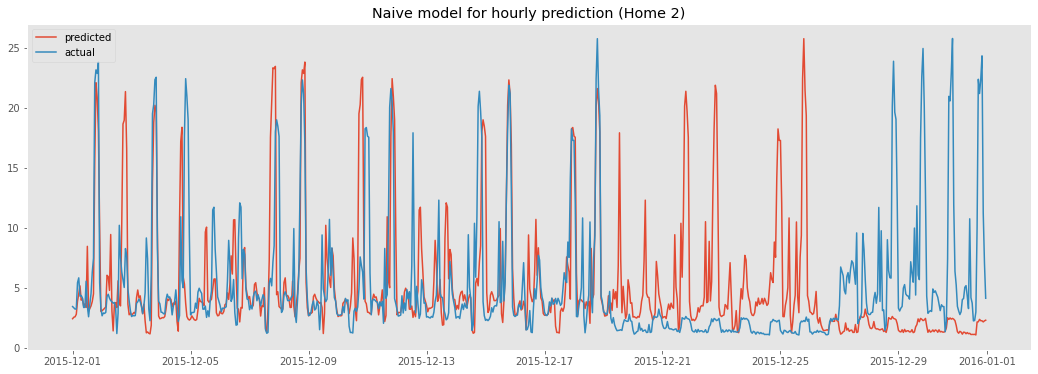

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(naive_hourly, label='predicted')
plt.plot(test_hourly['Usage [kW]'], label='actual')
plt.title('Naive model for hourly prediction (Home 2)')
plt.legend()
plt.grid()
plt.show()




# **LSTM** 

In [ ]:
merged_hourly['Day of the week'] = merged_hourly.index.dayofweek
merged_hourly['Day of the month'] = merged_hourly.index.day
merged_hourly['Month'] = merged_hourly.index.month
merged_hourly['Year'] = merged_hourly.index.year
merged_hourly['Hour'] = merged_hourly.index.hour

In [ ]:
merged_daily['Day of the week'] = merged_daily.index.dayofweek
merged_daily['Day of the month'] = merged_daily.index.day
merged_daily['Month'] = merged_daily.index.month
merged_daily['Year'] = merged_daily.index.year

Feature Selection based on correlation 

In [ ]:
LSTM_daily = merged_daily[["Usage [kW]"	,"Phase_B [kW]"	,"Phase_A [kW]","Family_Rm [kW]", "Furnace [kW]", "WaterHeater [kW]",	"Day of the week",	"Day of the month", "Month"]]
LSTM_hourly = merged_hourly[["Usage [kW]"	,"Phase_B [kW]"	,"Phase_A [kW]","Family_Rm [kW]", "Furnace [kW]", "WaterHeater [kW]",	"Day of the week",	"Day of the month", "Month","Hour"]]


**Hourly Predictions**

In [ ]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class
deep_learner = DeepModelTS(
data = LSTM_hourly,
Y_var = 'Usage [kW]',
lag = 6,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel()


Epoch 1/10
59/59 [==============================] - 4s 20ms/step - loss: 43.5473 - val_loss: 20.3580
Epoch 2/10
59/59 [==============================] - 1s 15ms/step - loss: 18.9028 - val_loss: 10.9132
Epoch 3/10
59/59 [==============================] - 1s 16ms/step - loss: 14.8168 - val_loss: 10.3703
Epoch 4/10
59/59 [==============================] - 1s 13ms/step - loss: 14.5864 - val_loss: 9.8089
Epoch 5/10
59/59 [==============================] - 1s 14ms/step - loss: 14.3543 - val_loss: 9.5473
Epoch 6/10
59/59 [==============================] - 1s 16ms/step - loss: 14.2436 - val_loss: 9.4641
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 14.1768 - val_loss: 9.4041
Epoch 8/10
59/59 [==============================] - 1s 9ms/step - loss: 14.1292 - val_loss: 9.3724
Epoch 9/10
59/59 [==============================] - 1s 8ms/step - loss: 14.0907 - val_loss: 9.3503
Epoch 10/10
59/59 [==============================] - 1s 8ms/step - loss: 14.0565 - val_loss: 9.3268

In [ ]:
deep_learner = DeepModelTS(
data = LSTM_hourly,
Y_var = "Usage [kW]",
lag = 24, # 24 past hours are used
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)
model = deep_learner.LSTModel()

Epoch 1/10
59/59 [==============================] - 3s 31ms/step - loss: 33.6949 - val_loss: 11.0020
Epoch 2/10
59/59 [==============================] - 2s 27ms/step - loss: 14.2000 - val_loss: 8.4130
Epoch 3/10
59/59 [==============================] - 2s 28ms/step - loss: 13.5134 - val_loss: 8.1065
Epoch 4/10
59/59 [==============================] - 2s 28ms/step - loss: 13.6830 - val_loss: 8.0512
Epoch 5/10
59/59 [==============================] - 2s 28ms/step - loss: 13.4210 - val_loss: 7.9630
Epoch 6/10
59/59 [==============================] - 2s 27ms/step - loss: 13.4006 - val_loss: 7.9753
Epoch 7/10
59/59 [==============================] - 2s 27ms/step - loss: 13.4340 - val_loss: 7.9480
Epoch 8/10
59/59 [==============================] - 2s 27ms/step - loss: 13.3216 - val_loss: 8.1090
Epoch 9/10
59/59 [==============================] - 2s 27ms/step - loss: 13.0849 - val_loss: 8.4149
Epoch 10/10
59/59 [==============================] - 2s 27ms/step - loss: 12.9249 - val_loss: 8.431

In [ ]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = LSTM_hourly['Usage [kW]'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

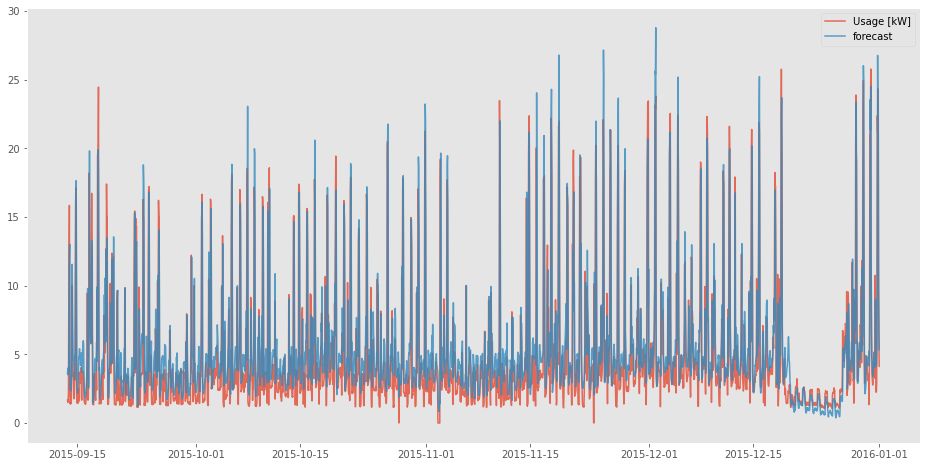

In [ ]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = LSTM_hourly.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(16, 8))
for dtype in ['Usage [kW]', 'forecast']:
  plt.plot(
    'Date & Time',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:

LSTM_MAE_hourly = mean_absolute_error(fc['Usage [kW]'], fc['forecast'])
LSTM_MAE_hourly


1.917518059783587

In [ ]:
ass2_home2=fc[['Date & Time','Usage [kW]','forecast']] 

In [ ]:
ass2_home2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home2LSTM.csv',sep=',', index=False)

**Daily Predictions**

In [ ]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class
deep_learner = DeepModelTS(
data = LSTM_daily,
Y_var = 'Usage [kW]',
lag = 6,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel()


Epoch 1/10
3/3 [==============================] - 1s 114ms/step - loss: 19666.0566 - val_loss: 15355.8076
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 18146.6191 - val_loss: 14080.9912
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 16468.1035 - val_loss: 12712.2236
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 14667.9824 - val_loss: 11372.2451
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 13029.3057 - val_loss: 10205.3281
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 11642.5801 - val_loss: 9042.2461
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 10147.1436 - val_loss: 7654.8540
Epoch 8/10
3/3 [==============================] - 0s 17ms/step - loss: 8083.9961 - val_loss: 5633.8579
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 4945.7358 - val_loss: 3472.1106
Epoch 10/10
3/3 [==============================] - 0s 16ms/s

In [ ]:
deep_learner = DeepModelTS(
data = LSTM_daily,
Y_var = 'Usage [kW]',
lag = 24, # 24 past hours are used
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)
model = deep_learner.LSTModel()

Epoch 1/10
3/3 [==============================] - 2s 131ms/step - loss: 26090.8496 - val_loss: 21138.3105
Epoch 2/10
3/3 [==============================] - 0s 35ms/step - loss: 27231.7207 - val_loss: 23414.0938
Epoch 3/10
3/3 [==============================] - 0s 38ms/step - loss: 28189.9160 - val_loss: 24193.2031
Epoch 4/10
3/3 [==============================] - 0s 35ms/step - loss: 27592.3457 - val_loss: 21728.9434
Epoch 5/10
3/3 [==============================] - 0s 32ms/step - loss: 26547.8691 - val_loss: 20683.6348
Epoch 6/10
3/3 [==============================] - 0s 35ms/step - loss: 25958.8262 - val_loss: 20604.4277
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 24874.6719 - val_loss: 18113.6250
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 23501.4707 - val_loss: 20693.5703
Epoch 9/10
3/3 [==============================] - 0s 34ms/step - loss: 24186.9609 - val_loss: 20857.4023
Epoch 10/10
3/3 [==============================] - 0s 

In [ ]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = LSTM_daily['Usage [kW]'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

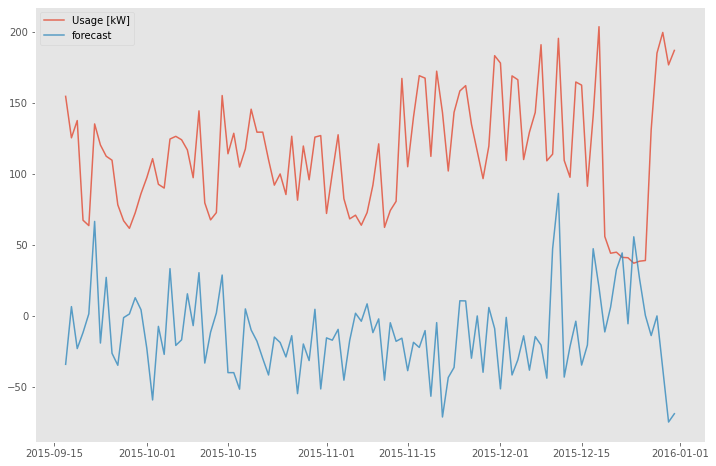

In [ ]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = LSTM_daily.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['Usage [kW]', 'forecast']:
  plt.plot(
    'Date & Time',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:

LSTM_MAE_daily = mean_absolute_error(fc['Usage [kW]'], fc['forecast'])
LSTM_MAE_daily 


127.46292442038195

**ARIMA Model**

To build a time-series model, one that you can use to predict future values, the dataset needs to be stationary.

Using Dickey-Fuller Test helps to verify whether the data series is Stationary or not. For our time series to be stationary, the p-value from the test has to be ≤ 0.01.



In [ ]:
#ds=array(dataset).flatten()
ds=merged_daily.iloc[:,[0]]
ds_hourly=merged_hourly.iloc[:,[0]]
array(ds)
array(ds_hourly)


array([[ 2.06567111],
       [ 1.29710111],
       [ 1.41796222],
       ...,
       [11.22244778],
       [ 7.05967333],
       [ 4.12479111]])

In [ ]:
#Augmented Dickey-Fuller Test
# log_dataset: boolean indicating if we want to log-transform the dataset before running Augmented Dickey-Fuller test
from numpy import log
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset, log_dataset):
    ds = dataset
    if log_dataset:
        ds = dataset.apply(lambda x: log(x))
        ds.dropna(inplace=True)  
    result = adfuller(ds)  
    print('Augmented Dickey-Fuller Test')
    print('test statistic: %.10f' % result[0])
    print('p-value: %.10f' % result[1])
    print('critical values')
    for key, value in result[4].items():
        print('\t%s: %.10f' % (key, value))


In [ ]:
adf_test(ds,True)

Augmented Dickey-Fuller Test
test statistic: -6.2743000110
p-value: 0.0000000393
critical values
	1%: -3.4395289263
	5%: -2.8655907692
	10%: -2.5689271030


In [ ]:
adf_test(ds,False)

Augmented Dickey-Fuller Test
test statistic: -4.3930234980
p-value: 0.0003053860
critical values
	1%: -3.4396068880
	5%: -2.8656251219
	10%: -2.5689454047


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(11, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

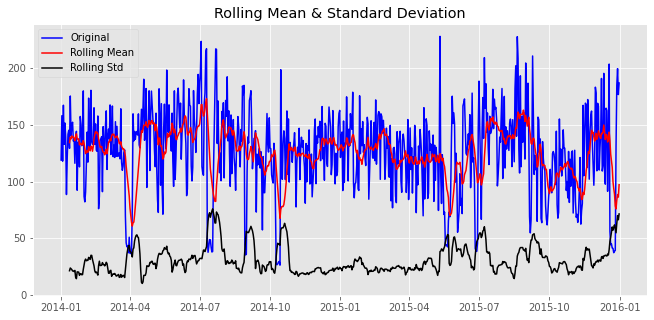

In [ ]:
test_stationarity(ds)

**Eliminating Trend and Seasonality**

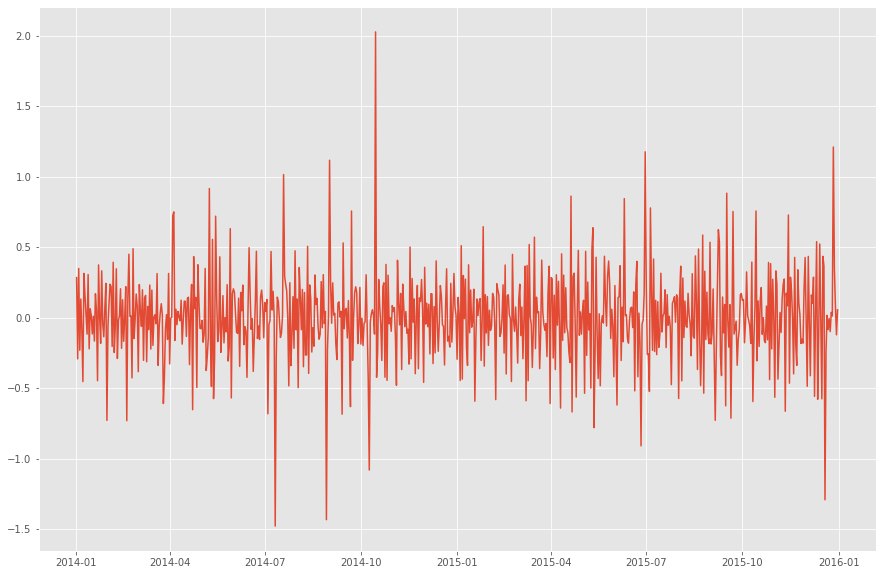

In [ ]:
ts_log = np.log(ds)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(15, 10))
plt.plot(ts_log_diff)
plt.show()

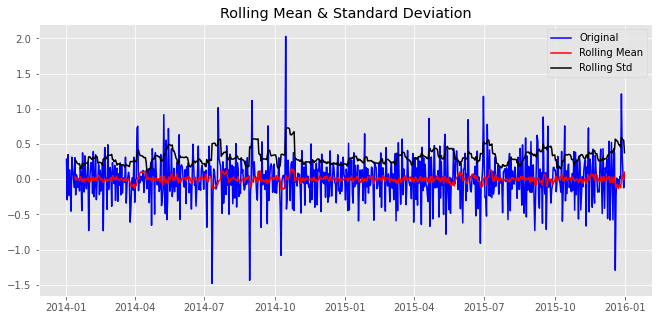

In [ ]:
test_stationarity(ts_log_diff)

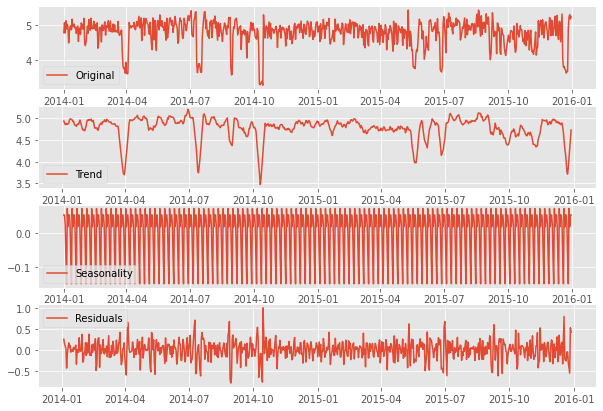

<Figure size 432x288 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10, 7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals

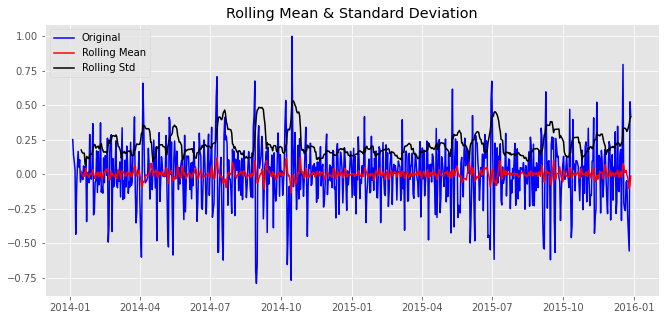

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
dta = ts_log_diff

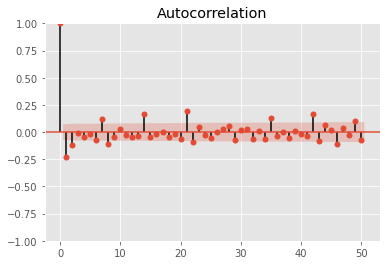

In [ ]:
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=50)
plt.show()

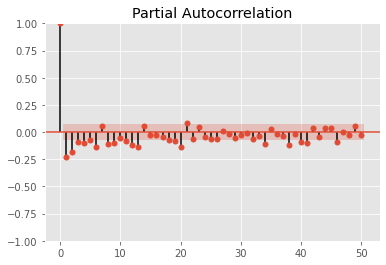

In [ ]:

sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=50, method="yw")
plt.show()

In [ ]:
# 1,0,1 ARIMA Model

model = ARIMA(ds, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Usage [kW]   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3573.156
Date:                Sun, 10 Apr 2022   AIC                           7154.313
Time:                        16:50:59   BIC                           7172.685
Sample:                    01-01-2014   HQIC                          7161.401
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.4184      2.713     46.605      0.000     121.102     131.735
ar.L1          0.6448      0.047     13.777      0.000       0.553       0.737
ma.L1         -0.1975      0.061     -3.226      0.0

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7239.192, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9199.477, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7353.940, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8478.058, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7200.077, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8128.724, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.97 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7188.601, Time=0.57 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=7933.101, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7198.519, Time=0.58 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.14 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=7787.551, Time=0.46 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=7181.249, Time=1.23 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=7173.5

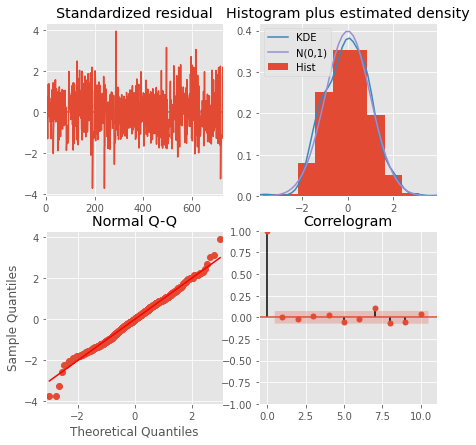

In [ ]:
import pmdarima as pm
model = pm.auto_arima(ds, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.plot_diagnostics(figsize=(7,7))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
# evaluate an ARIMA model using a walk-forward validation

def arima_model(electrictydata,testsize,p,d,q):
	X = electrictydata.values
	size = int(len(X) - testsize)
	train, test = X[0:size], X[size:len(X)]
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		model = ARIMA(history, order=(p,d,q))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
	# evaluate forecasts
	rmse = sqrt(mean_squared_error(test, predictions))
	mae=mean_absolute_error(predictions , test) 
	mape = np.mean(np.abs(predictions - test)/np.abs(test))
	print('Test RMSE: %.3f' % rmse)
	print('Test MAE: %.3f' % mae)
	print('Test MAPE: %.3f' % mape)

	# Constructing the forecast dataframe
	fc = electrictydata.tail(len(predictions)).copy()
	fc.reset_index(inplace=True)
	fc['predicted'] = predictions	
	ass2=fc[['Date & Time','Usage [kW]','predicted']]
	ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home2Arima.csv',sep=',', index=False)

	
  
	fc.rename(columns = {'Usage [kW]': 'actual'}, 
          inplace=True)
	plt.figure(figsize=(30, 5))
	plt.title("Arima model for Electricity prediction for December 2015 for HOME 2 dataset.")
	for dtype in ['actual', 'predicted']:
		plt.plot(
    	'Date & Time',
    	dtype,
    	data=fc,
    	label=dtype,
    	alpha=0.8
		)
 		
	plt.legend()
	plt.grid()
	plt.show()


predicted=154.120871, expected=109.421542
predicted=124.522951, expected=169.044441
predicted=144.736881, expected=166.333969
predicted=147.802014, expected=110.128881
predicted=123.820340, expected=129.380353
predicted=127.232276, expected=143.279213
predicted=134.009928, expected=190.985510
predicted=156.337188, expected=109.244218
predicted=125.388410, expected=113.931566
predicted=120.854648, expected=195.483833
predicted=155.216181, expected=109.495502
predicted=125.634797, expected=97.653560
predicted=113.992544, expected=164.741397
predicted=140.109905, expected=162.541311
predicted=145.012346, expected=91.354811
predicted=115.709063, expected=141.231756
predicted=130.430415, expected=203.686684
predicted=160.318670, expected=55.925326
predicted=105.254269, expected=44.161984
predicted=86.860460, expected=44.903618
predicted=83.228230, expected=41.235781
predicted=80.487770, expected=40.999290
predicted=79.286798, expected=37.141638
predicted=76.883816, expected=38.562556
predic

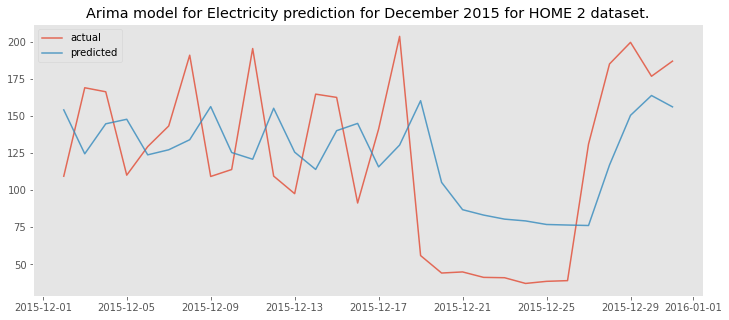

In [ ]:
X = ds
arima_model(X,30,1,0,1)

ARIMA for Hourly time intervals

In [ ]:
adf_test(ds_hourly,False)

NameError: ignored

In [ ]:
ds_hourly

,Usage [kW]
Date & Time,
2014-01-01 00:00:00,2.065671
2014-01-01 01:00:00,1.297101
2014-01-01 02:00:00,1.417962
2014-01-01 03:00:00,1.625286
2014-01-01 04:00:00,2.668839
...,...
2015-12-31 19:00:00,22.399769
2015-12-31 20:00:00,24.316530
2015-12-31 21:00:00,11.222448


In [ ]:
dta_hourly = ds_hourly

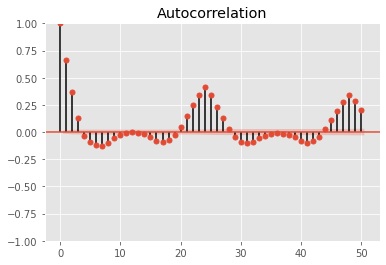

In [ ]:
sm.graphics.tsa.plot_acf(ds_hourly.values.squeeze(), lags=50)
plt.show()

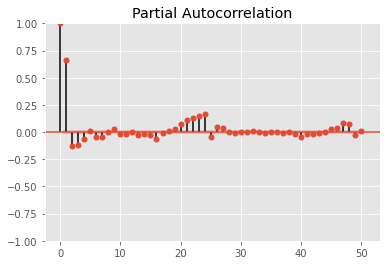

In [ ]:
sm.graphics.tsa.plot_pacf(ds_hourly.values.squeeze(), lags=50, method="yw")
plt.show()

In [ ]:
ds_hourly

,Usage [kW]
Date & Time,
2014-01-01 00:00:00,2.065671
2014-01-01 01:00:00,1.297101
2014-01-01 02:00:00,1.417962
2014-01-01 03:00:00,1.625286
2014-01-01 04:00:00,2.668839
...,...
2015-12-31 19:00:00,22.399769
2015-12-31 20:00:00,24.316530
2015-12-31 21:00:00,11.222448


predicted=5.167412, expected=3.432574
predicted=3.950008, expected=3.329581
predicted=4.054256, expected=3.222489
predicted=3.961078, expected=3.228928
predicted=3.979405, expected=5.425121
predicted=5.571754, expected=5.824531
predicted=5.627551, expected=4.299682
predicted=4.511864, expected=4.355286
predicted=4.716392, expected=4.142344
predicted=4.531614, expected=3.356969
predicted=3.988353, expected=3.368739
predicted=4.076785, expected=5.543363
predicted=5.643163, expected=3.468304
predicted=3.905599, expected=2.583843
predicted=3.518815, expected=3.604309
predicted=4.316820, expected=4.511651
predicted=4.858361, expected=6.301819
predicted=6.078855, expected=7.460831
predicted=6.741084, expected=22.068314
predicted=17.254564, expected=23.148429
predicted=16.495476, expected=22.851163
predicted=16.397595, expected=23.800989
predicted=17.109390, expected=5.432840
predicted=3.647787, expected=3.323788
predicted=4.095198, expected=2.663868
predicted=3.549636, expected=2.897812
pred

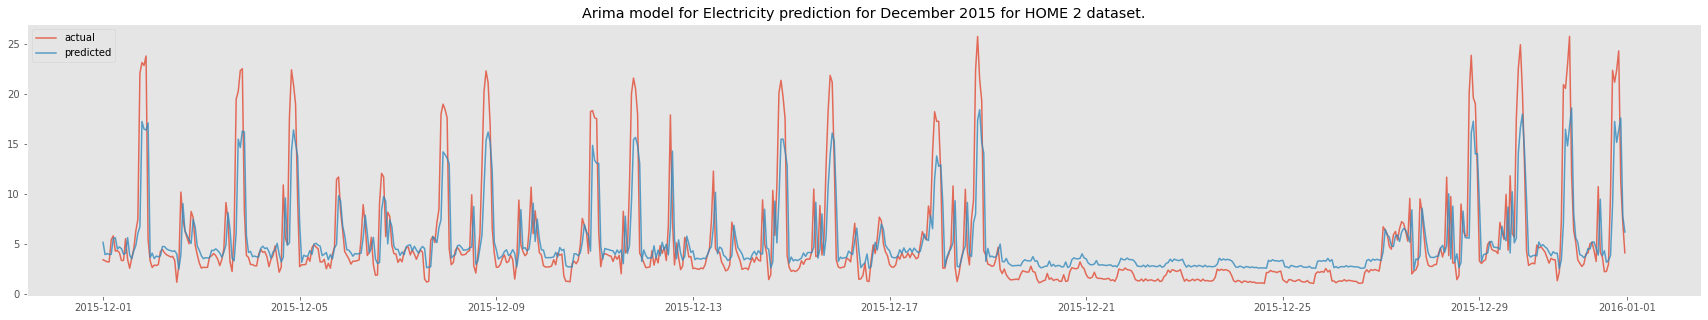

In [ ]:
X = ds_hourly
arima_model(X,744,1,0,1)

In [ ]:
fc

In [ ]:
ass2=fc[['Date & Time','Usage [kW]','forecast']]
ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home2Arima.csv',sep=',', index=False)